In [155]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houses_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

houses_df.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500


In [156]:
houses_df.describe(include=['O'])

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


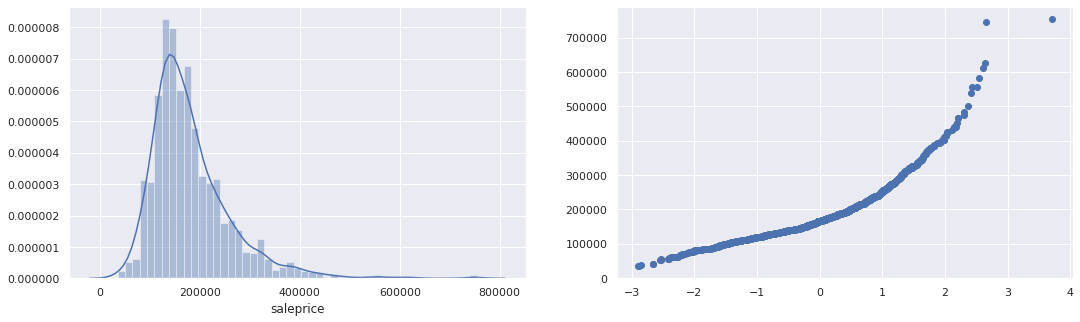

In [157]:
sns.set(style='darkgrid')

# Checking for normality in the target variable 'saleprice', visually, using a qq plot
norm = np.random.normal(0, 1, len(houses_df))

# Sorting the values in ascending order.
norm.sort()

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(houses_df.saleprice)

plt.subplot(1,2,2)
plt.scatter(norm, houses_df.saleprice.sort_values())

plt.show()

In [158]:
# Missing value number and type detection
for column_name in houses_df.columns[3:]:
    nan_list = []
    print("Problematic values: {}".format(column_name))
    for idx, value in enumerate(houses_df[column_name]):
        if pd.isna(value):
            nan_list.append(str(value))
    print(len(nan_list), ': ', set(nan_list))
print(len(houses_df))

Problematic values: lotfrontage
259 :  {'nan'}
Problematic values: lotarea
0 :  set()
Problematic values: street
0 :  set()
Problematic values: alley
1369 :  {'None'}
Problematic values: lotshape
0 :  set()
Problematic values: landcontour
0 :  set()
Problematic values: utilities
0 :  set()
Problematic values: lotconfig
0 :  set()
Problematic values: landslope
0 :  set()
Problematic values: neighborhood
0 :  set()
Problematic values: condition1
0 :  set()
Problematic values: condition2
0 :  set()
Problematic values: bldgtype
0 :  set()
Problematic values: housestyle
0 :  set()
Problematic values: overallqual
0 :  set()
Problematic values: overallcond
0 :  set()
Problematic values: yearbuilt
0 :  set()
Problematic values: yearremodadd
0 :  set()
Problematic values: roofstyle
0 :  set()
Problematic values: roofmatl
0 :  set()
Problematic values: exterior1st
0 :  set()
Problematic values: exterior2nd
0 :  set()
Problematic values: masvnrtype
8 :  {'None'}
Problematic values: masvnrarea
8 :

In [159]:
# Replace missing numerical values with the mean and missing categoricals ('None') with 'No--' 
# -- = first to letters of feature, ie. NoFe = 'no fence' 
# and the lone missing electrical value with house_df.electrical.mode()

houses_df['electrical'].fillna(str(houses_df['electrical'].mode()), inplace=True)

for column_name in houses_df.columns[3:]:
    for idx, value in enumerate(houses_df[column_name]):
        if pd.isna(value):
            try:
                houses_df[column_name].fillna(houses_df[column_name].mean(), inplace=True)
            except:
                houses_df[column_name].fillna('No' + column_name[:2].capitalize(), inplace=True)

In [160]:
# Verifying missing value correction
for column_name in houses_df.columns[3:]:
    nan_list = []
    print("Problematic values: {}".format(column_name))
    for idx, value in enumerate(houses_df[column_name]):
        if pd.isna(value):
            nan_list.append(str(value))
    print(len(nan_list), ': ', set(nan_list))
print(len(houses_df))

Problematic values: lotfrontage
0 :  set()
Problematic values: lotarea
0 :  set()
Problematic values: street
0 :  set()
Problematic values: alley
0 :  set()
Problematic values: lotshape
0 :  set()
Problematic values: landcontour
0 :  set()
Problematic values: utilities
0 :  set()
Problematic values: lotconfig
0 :  set()
Problematic values: landslope
0 :  set()
Problematic values: neighborhood
0 :  set()
Problematic values: condition1
0 :  set()
Problematic values: condition2
0 :  set()
Problematic values: bldgtype
0 :  set()
Problematic values: housestyle
0 :  set()
Problematic values: overallqual
0 :  set()
Problematic values: overallcond
0 :  set()
Problematic values: yearbuilt
0 :  set()
Problematic values: yearremodadd
0 :  set()
Problematic values: roofstyle
0 :  set()
Problematic values: roofmatl
0 :  set()
Problematic values: exterior1st
0 :  set()
Problematic values: exterior2nd
0 :  set()
Problematic values: masvnrtype
0 :  set()
Problematic values: masvnrarea
0 :  set()
Probl

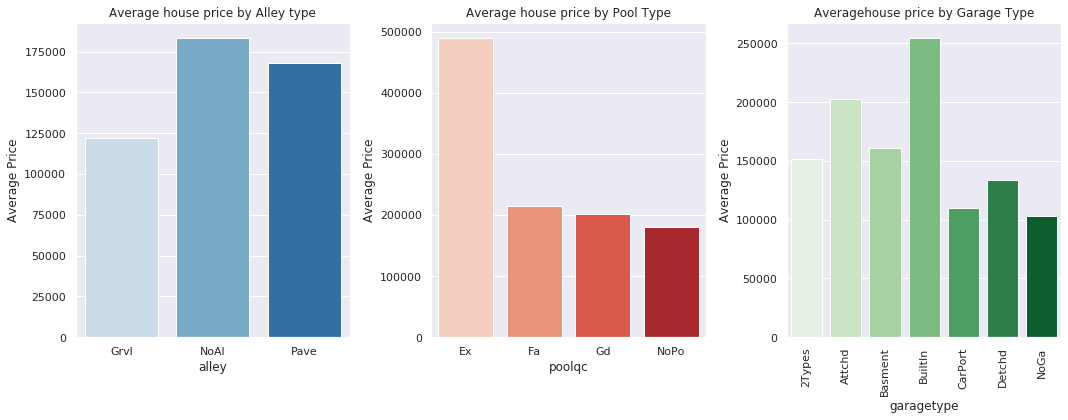

In [161]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.barplot(houses_df.groupby('alley')['saleprice'].mean().index, houses_df.groupby('alley')['saleprice'].mean(), 
            palette='Blues')
plt.title("Average house price by Alley type")
plt.ylabel("Average Price")

plt.subplot(1,3,2)
sns.barplot(houses_df.groupby('poolqc')['saleprice'].mean().index, houses_df.groupby('poolqc')['saleprice'].mean(), 
            palette='Reds')
plt.title("Average house price by Pool Type")
plt.ylabel("Average Price")

plt.subplot(1,3,3)
sns.barplot(houses_df.groupby('garagetype')['saleprice'].mean().index, houses_df.groupby('garagetype')['saleprice'].mean(), 
            palette='Greens')
plt.title("Averagehouse price by Garage Type")
plt.ylabel("Average Price")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [198]:
# Creating our dummy variables
columns = ['alley','poolqc','garagetype']

# Create a dataframe with added dummy features
houses_df_dummies = pd.get_dummies(houses_df, columns=columns, drop_first=True)
dummy_columns = [c for c in houses_df_dummies.columns if any([c.startswith(n) for n in columns])]
dummy_columns

['alley_NoAl',
 'alley_Pave',
 'poolqc_Fa',
 'poolqc_Gd',
 'poolqc_NoPo',
 'garagetype_Attchd',
 'garagetype_Basment',
 'garagetype_BuiltIn',
 'garagetype_CarPort',
 'garagetype_Detchd',
 'garagetype_NoGa']

In [199]:
houses_df_dummies[dummy_columns].head()

,alley_NoAl,alley_Pave,poolqc_Fa,poolqc_Gd,poolqc_NoPo,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NoGa
0,1,0,0,0,1,1,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,1,1,0,0,0,0,0


In [245]:
X = houses_df_dummies[dummy_columns]
Y = houses_df_dummies.saleprice

# We need to manually add a constant in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     49.80
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.54e-93
Time:                        17:55:13   Log-Likelihood:                -18310.
No. Observations:                1460   AIC:                         3.664e+04
Df Residuals:                    1448   BIC:                         3.671e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.617e+05   5.62e+04      8.213      0.000    3.51e+05    5.72e+05
alley_NoAl           1.42e+04   1.01e+04      1.409      0.159   -5569.785     3.4e+04
alley_Pave          3.358e+04   1.43e+04      2.341      0.019    5445.283    6.17e+04
poolqc_Fa          -3.091e+05    6.8e+04     -4.548      0.000   -4.42e+05   -1.76e+05
poolqc_Gd          -3.226e+05    6.2e+04     -5.200      0.000   -4.44e+05   -2.01e+05
poolqc_NoPo        -3.222e+05   4.81e+04     -6.702      0.000   -4.17e+05   -2.28e+05
garagetype_Attchd    4.87e+04   2.79e+04      1.747      0.081   -5972.562    1.03e+05
garagetype_Basment  6920.7635   3.19e+04      0.217      0.828   -5.56e+04    6.94e+04
garagetype_BuiltIn  1.011e+05   2.87e+04      3.522      0.000    4.48e+04    1.57e+05
garagetype_CarPort -4.369e+04   3.58e+04     -1.219      0.223   -1.14e+05    2.66e+04
garagetype_Detchd  -2.049e+04    2.8e+04     -0.733      0.464   -7.53e+04    3.44e+04
garagetype_NoGa    -4.958e+04   2.88e+04     -1.725      0.085   -1.06e+05    6812.576
==============================================================================
Omnibus:                      621.430   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4177.383
Skew:                           1.850   Prob(JB):                         0.00
Kurtosis:                      10.415   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### This preliminary regression has a low r-squared, thus informing us that our model does not yet explain much of the variation from the mean, y_bar. In other words, only about 27.4% of the change in Y can be explained by the changes in our feature variables, X_i.

In [247]:
#### Using scikit-learn ####

# Y is the target variable
Y = houses_df_dummies.saleprice

# X are the explanatory variables
X_skl = houses_df_dummies[dummy_columns]

# We create a LinearRegression model object from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

lrm.fit(X_skl,Y)

# Inspect the results
print('The coefficients: {}'.format(lrm.coef_))
print('\nThe intercept: {}'.format(lrm.intercept_))

The coefficients: [  14199.52430576   33580.55771183 -309094.1875428  -322604.1875428
 -322242.06474196   48702.20208321    6920.7634929   101101.81791874
  -43687.80960651  -20486.17300239  -49584.06141728]

The intercept: 461692.4611538332


> #  Check that the model meets the Gauss-Markov Conditions 
- see [Gauss-Markov Assumptions](https://www.youtube.com/watch?v=NjTpHS5xLP8) on <i>Youtube</i> and [Verifying the Assumptions of Linear Regression in Python and R](https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0) at <i>Towards Data Science</i> for more info.
- <font color='blue'>BLUE</font> (Best Linear Unbiased Estimator) of the coefficients is the ordinary least squares (OLS) estimator provided that the conditions are met. 'Best’ in <font color='blue'>BLUE</font> means resulting in the lowest variance of the estimate, in comparison to other unbiased, linear estimators.

### 1. Linearity of the model in its coefficients / Linearity in parameters
- To detect nonlinearity one can visually inspect plots of observed values vs. predicted values. Observing a ‘bowed’ pattern indicates that the model makes systematic errors whenever it is making unusually large or small predictions.

In [248]:
# predictions of the linear regression
predictions = lrm.predict(X_skl)

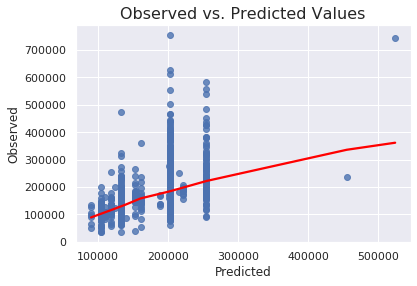

In [249]:
sns.regplot(predictions, Y, lowess=True, line_kws={'color': 'red'})
plt.title('Observed vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

### 2. Expectation (mean) of residuals is zero
- E{εi} = 0, i = 1, . . . , N

In [250]:
errors = Y - predictions

# Should produce a number very close to zero
print("Mean of the errors: {}".format(np.mean(errors)))

Mean of the errors: 4.2100883510014784e-11


### 3. No / low multicollinearity

- The features should be linearly independent. Individual features should be only weakly correlated with one another, and ideally completely uncorrelated. In other words, we should not be able to use a linear model to accurately predict one feature using another one.
- Watch out for is the ‘dummy variable trap’ (drop_first=True)

In [251]:
X_skl.corr()

,alley_NoAl,alley_Pave,poolqc_Fa,poolqc_Gd,poolqc_NoPo,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NoGa
alley_NoAl,1.000,-0.659,0.010,0.012,-0.018,0.226,0.030,0.065,0.020,-0.269,-0.049
alley_Pave,-0.659,1.000,-0.006,-0.008,0.012,-0.122,-0.020,-0.043,-0.013,0.170,-0.005
poolqc_Fa,0.010,-0.006,1.000,-0.002,-0.534,0.031,-0.004,-0.009,-0.003,-0.022,-0.009
poolqc_Gd,0.012,-0.008,-0.002,1.000,-0.654,0.037,-0.005,-0.011,-0.004,-0.027,-0.011
poolqc_NoPo,-0.018,0.012,-0.534,-0.654,1.000,-0.037,0.008,0.018,0.005,0.019,0.017
garagetype_Attchd,0.226,-0.122,0.031,0.037,-0.037,1.000,-0.139,-0.308,-0.096,-0.729,-0.294
garagetype_Basment,0.030,-0.020,-0.004,-0.005,0.008,-0.139,1.000,-0.029,-0.009,-0.069,-0.028
garagetype_BuiltIn,0.065,-0.043,-0.009,-0.011,0.018,-0.308,-0.029,1.000,-0.020,-0.152,-0.061
garagetype_CarPort,0.020,-0.013,-0.003,-0.004,0.005,-0.096,-0.009,-0.020,1.000,-0.047,-0.019
garagetype_Detchd,-0.269,0.170,-0.022,-0.027,0.019,-0.729,-0.069,-0.152,-0.047,1.000,-0.146


### 4. Homoscedasticity (equal variance) of errors/residuals

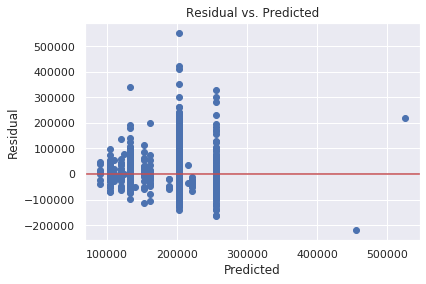

In [252]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r')
plt.title('Residual vs. Predicted')
plt.show()

In [253]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 331.697 and p value is 4.1e-74
Levene test statistic value is 108.237 and p value is 6.47e-25


- ### The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are <i>heteroscedastic</i>.

### 5. No autocorrelation of errors/residuals
- error terms should be uncorrelated with one another

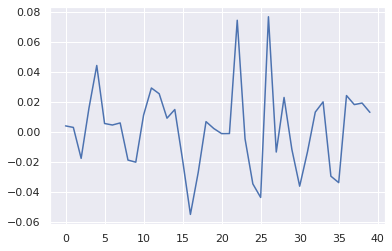

In [254]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

### 6. The features and residuals are uncorrelated

In [255]:
from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], errors)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: const --- correlation: nan, p-value: nan
Variable: alley_NoAl --- correlation: -0.0000, p-value: 1.0000
Variable: alley_Pave --- correlation: 0.0000, p-value: 1.0000
Variable: poolqc_Fa --- correlation: 0.0000, p-value: 1.0000
Variable: poolqc_Gd --- correlation: 0.0000, p-value: 1.0000
Variable: poolqc_NoPo --- correlation: 0.0000, p-value: 1.0000
Variable: garagetype_Attchd --- correlation: -0.0000, p-value: 1.0000
Variable: garagetype_Basment --- correlation: 0.0000, p-value: 1.0000
Variable: garagetype_BuiltIn --- correlation: 0.0000, p-value: 1.0000
Variable: garagetype_CarPort --- correlation: 0.0000, p-value: 1.0000
Variable: garagetype_Detchd --- correlation: 0.0000, p-value: 1.0000
Variable: garagetype_NoGa --- correlation: -0.0000, p-value: 1.0000
